#### Image Filtering and Noise Removal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:

def show_img(img: np.ndarray):
	if img is not None:
		img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
		plt.imshow(img_rgb)
	else:
		print("No image to show.")

In [3]:
def add_salt_pepper_noise(img: np.ndarray, density: float = 0.02) -> np.ndarray:
    if img is None:
        return
    noisy_img = img.copy()
    height, width = noisy_img.shape[:2]
    num_salt = int(np.ceil(density / 2 * height * width))
    num_pepper = int(np.ceil(density / 2 * height * width))

    for i in range(num_salt):
        randx = np.random.randint(0, height - 1)
        randy = np.random.randint(0, width - 1)
        if noisy_img.ndim >= 3:
            noisy_img[randx, randy, :] = 255
        else:
            noisy_img[randx, randy] = 255

    for i in range(num_pepper):
        randx = np.random.randint(0, height - 1)
        randy = np.random.randint(0, width - 1)
        if noisy_img.ndim >= 3:
            noisy_img[randx, randy, :] = 0
        else:
            noisy_img[randx, randy] = 0
    return noisy_img

In [4]:
def add_gaussian_noise(img: np.ndarray, mean: float = 0, std: float = 10.0) -> np.ndarray:
    if img is None:
        return None

    noisy_img = img.astype(np.float32).copy()

    if img.ndim == 2:
        noise = np.random.normal(mean, std, size=img.shape)
        noisy_img += noise
    elif img.ndim == 3:
        noise = np.random.normal(mean, std, size=img.shape)
        noisy_img += noise

    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

    return noisy_img

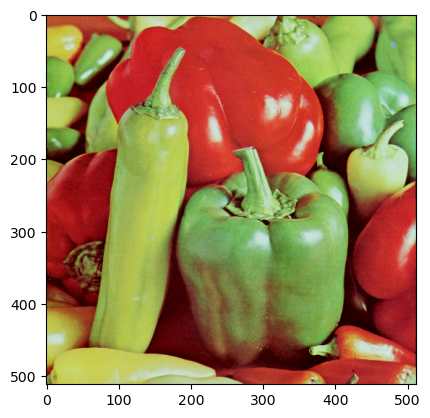

In [5]:
img = cv.imread("./stdimgs/peppers.png")
show_img(img=img)

In [6]:
def mean_filter(noisy_img: np.ndarray, kernel_size: int = 3):
    if kernel_size % 2 == 0:
        print("Kernel should be odd")
        return
    height, width = noisy_img.shape[:2]
    pad = kernel_size // 2
    img = noisy_img.copy()
    img = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode="constant")
    channel = 1 if noisy_img.ndim == 2 else 3
    for c in range(channel):
        for y in range(width):
            for x in range(height):
                kernel = img[x : x + kernel_size, y : y + kernel_size, c]
                img[x + pad, y + pad, c] = np.mean(kernel)
    return img


def median_filter(noisy_img: np.ndarray, kernel_size: int = 3):
    if kernel_size % 2 == 0:
        print("Kernel should be odd")
        return
    height, width = noisy_img.shape[:2]
    pad = kernel_size // 2
    img = noisy_img.copy()
    img = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode="constant")
    channel = 1 if noisy_img.ndim == 2 else 3
    for c in range(channel):
        for y in range(width):
            for x in range(height):
                kernel = img[x : x + kernel_size, y : y + kernel_size, c]
                img[x + pad, y + pad, c] = np.median(kernel)
    return img


def gaussian_filter(noisy_img: np.ndarray, kernel_size: int = 3, sigma: float = 1.0):
    if kernel_size % 2 == 0:
        print("Kernel should be odd")
        return noisy_img

    pad = kernel_size // 2
    img = noisy_img.copy()
    padding = (
        ((pad, pad), (pad, pad), (0, 0))
        if noisy_img.ndim == 3
        else ((pad, pad), (pad, pad))
    )
    padded_img = np.pad(img, padding, mode="constant")
    channel = 1 if noisy_img.ndim == 2 else noisy_img.shape[2]
    filtered_img = noisy_img.copy().astype(np.float32)

    # Create the Gaussian kernel
    x, y = np.mgrid[
        -(kernel_size // 2) : kernel_size // 2 + 1,
        -(kernel_size // 2) : kernel_size // 2 + 1,
    ]
    gaussian_kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()

    height, width = noisy_img.shape[:2]

    for c in range(channel):
        for y in range(height):
            for x in range(width):
                y_start = y
                y_end = y + kernel_size
                x_start = x
                x_end = x + kernel_size

                if channel == 1:
                    neighbor = padded_img[y_start:y_end, x_start:x_end]
                    filtered_img[y, x] = np.sum(neighbor * gaussian_kernel)
                else:
                    neighbor = padded_img[y_start:y_end, x_start:x_end, c]
                    filtered_img[y, x, c] = np.sum(neighbor * gaussian_kernel)

    return np.clip(filtered_img, 0, 255).astype(np.uint8)